In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans


In [48]:
#View dataframe columns
df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
#Check data types
df.info()
print("No NANs")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
No NANs


In [50]:
#Explore data for numbers of children
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [51]:
#Explore the regions where the data is from (United States)
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:title={'center':'Premium ($)'}, ylabel='Frequency'>

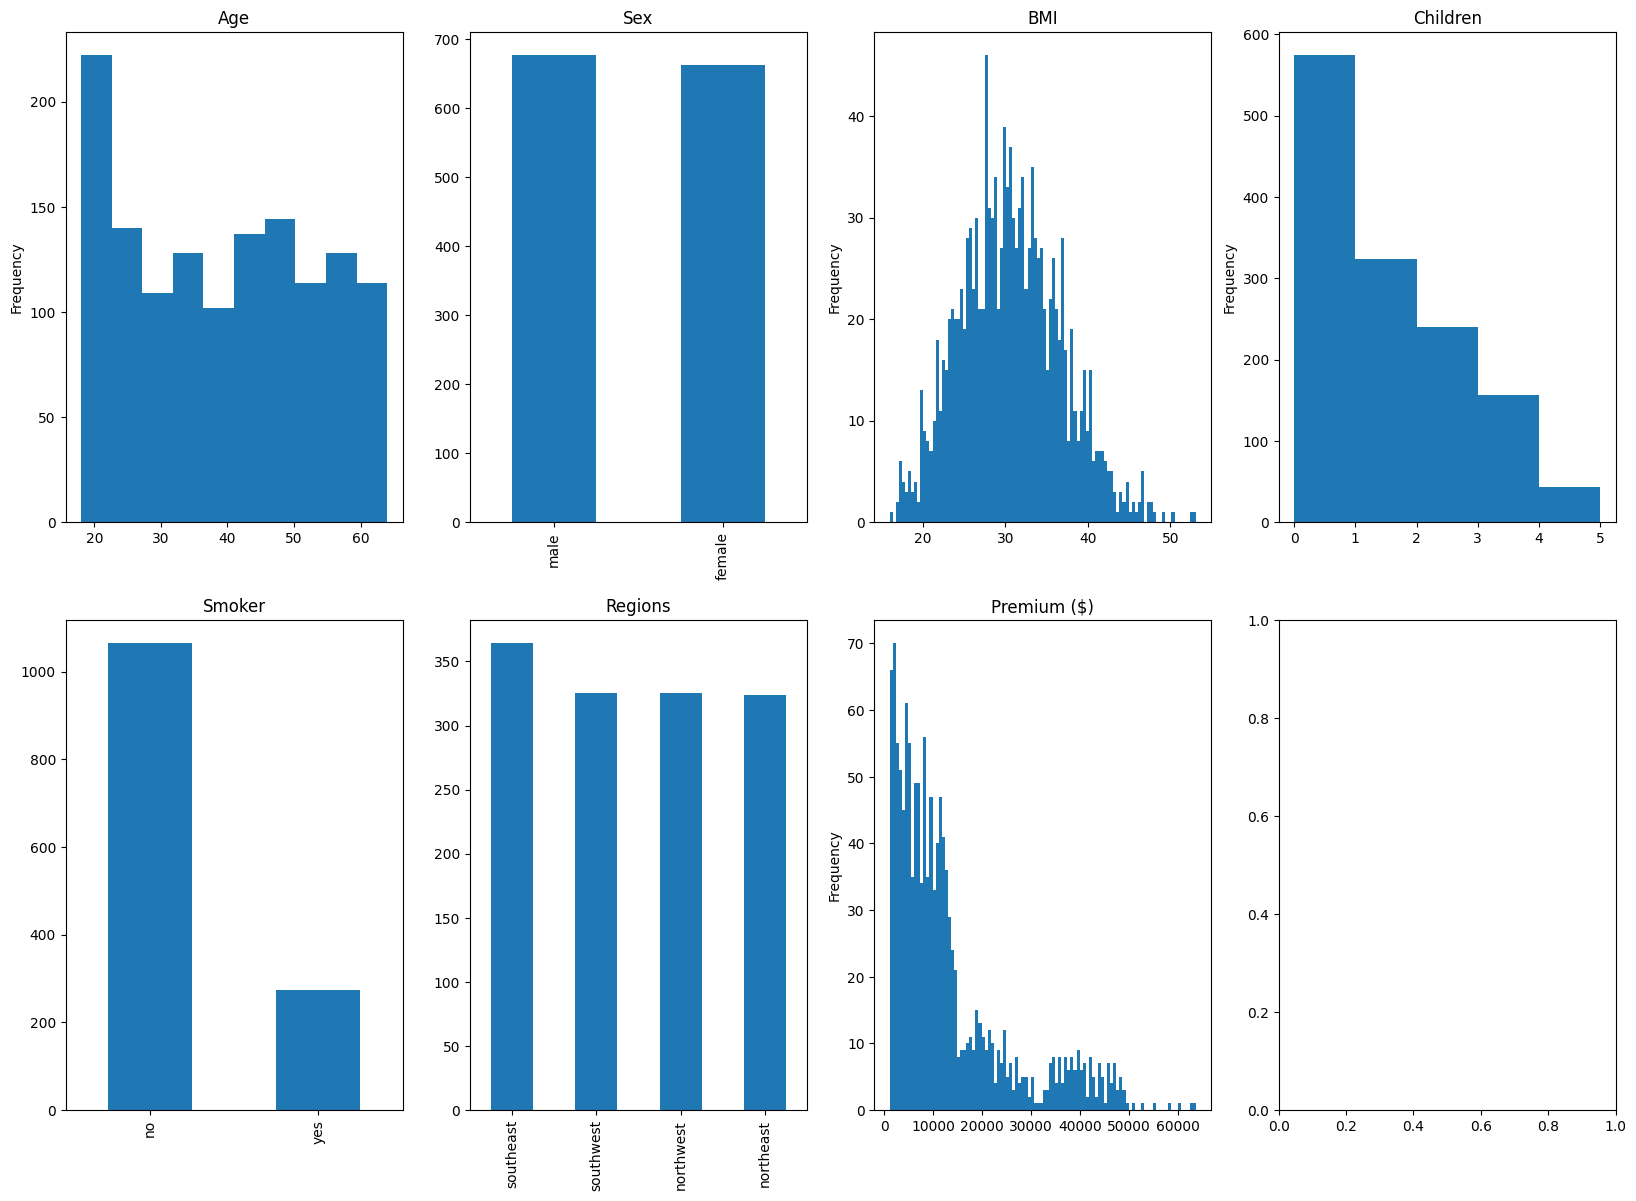

In [52]:
#Plot histograms for each column to see occurances
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 14))
df["age"].plot(kind="hist", ax=axes[0, 0], title='Age')
df['sex'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Sex')
df["bmi"].plot(kind="hist", ax=axes[0, 2], title='BMI', bins=100)
df["children"].plot(kind="hist", ax=axes[0, 3], title='Children', bins=range(0, 6, 1))
df['smoker'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Smoker')
df['region'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Regions')
df["charges"].plot(kind="hist", ax=axes[1, 2], title='Premium ($)', bins=100)



In [53]:
#One hot encode the data so all data is numerical.
oh_df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'])
oh_df.drop(columns=['smoker_no', 'sex_female'], inplace=True)

test_df = oh_df #test_df will be used in the future to compare the regression model to the uncleaned data

oh_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


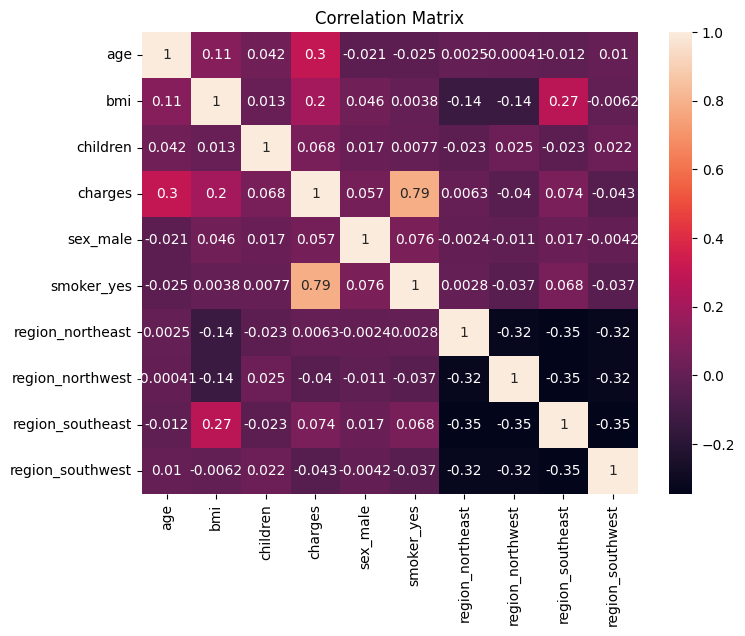

The strongest correlation is between smoking and insurance charges.


In [54]:
#Plot a correlation matrix to analyse trends

plt.figure(figsize=(8,6))
sns.heatmap(oh_df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()
print("The strongest correlation is between smoking and insurance charges.")

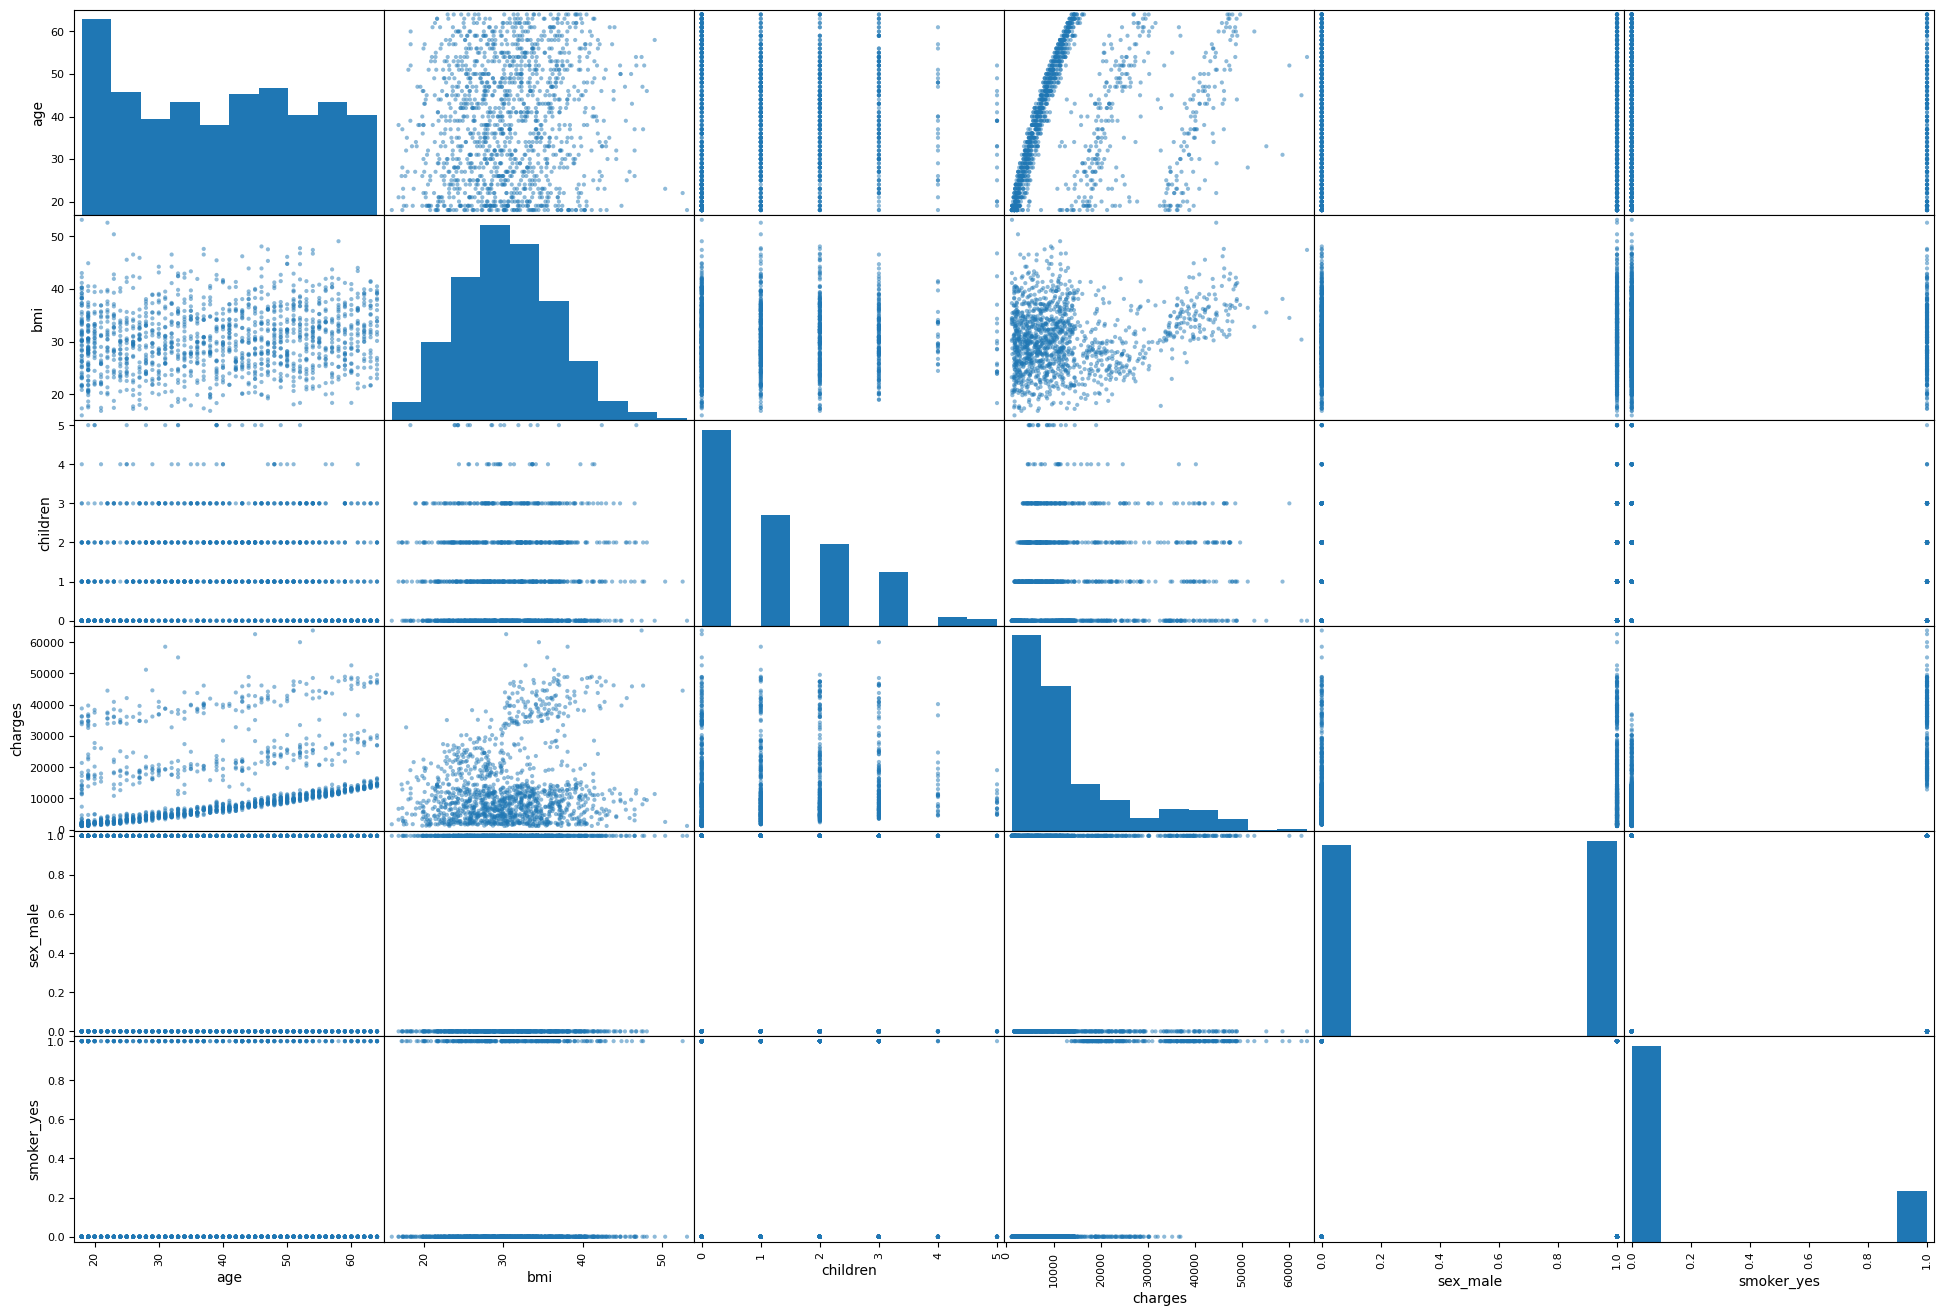

Main visible trends are between charges vs smoking/age/bmi


In [55]:
#Plot scatter matrix to check for any other trends
attributes = ['age','bmi','children','charges','sex_male', "smoker_yes"]
scatter_matrix(oh_df[attributes], figsize=(24,16))
plt.show()

print("Main visible trends are between charges vs smoking/age/bmi")

In [56]:
#Compare means for each region to analyse client information
region_northeast_df = oh_df[oh_df['region_northeast'] == 1]
region_northwest_df = oh_df[oh_df['region_northwest'] == 1]
region_southeast_df = oh_df[oh_df['region_southeast'] == 1]
region_southwest_df = oh_df[oh_df['region_southwest'] == 1]

ne_mean = region_northeast_df.mean()
nw_mean = region_northwest_df.mean()
se_mean = region_southeast_df.mean()
sw_mean = region_southwest_df.mean()

print("Average client from NE region:")
print(ne_mean)
print("\nAverage client from NW region:")
print(nw_mean)
print("\nAverage client from SE region:")
print(se_mean)
print("\nAverage client from SW region:")
print(sw_mean)

print("From visual inspection the data for clients in each region is quite similar")

Average client from NE region:
age                    39.268519
bmi                    29.173503
children                1.046296
charges             13406.384516
sex_male                0.503086
smoker_yes              0.206790
region_northeast        1.000000
region_northwest        0.000000
region_southeast        0.000000
region_southwest        0.000000
dtype: float64

Average client from NW region:
age                    39.196923
bmi                    29.199785
children                1.147692
charges             12417.575374
sex_male                0.495385
smoker_yes              0.178462
region_northeast        0.000000
region_northwest        1.000000
region_southeast        0.000000
region_southwest        0.000000
dtype: float64

Average client from SE region:
age                    38.939560
bmi                    33.355989
children                1.049451
charges             14735.411438
sex_male                0.519231
smoker_yes              0.250000
region_northeast 

In [57]:
#Charges based on sex. Isolate from smoking because that would skew data
mean_male = oh_df[oh_df['sex_male'] == 1]
mean_male = mean_male[mean_male['smoker_yes'] == 0].mean()
mean_female = oh_df[oh_df['sex_male'] == 0]
mean_female = mean_female[mean_female['smoker_yes'] == 0].mean()


print("Mean male charges\n", mean_male)
print("Mean female charges\n", mean_female)

print("Most values apart for charges are similar. Charges for women are slightly higher than for men")


Mean male charges
 age                   39.061896
bmi                   30.770580
children               1.092843
charges             8087.204731
sex_male               1.000000
smoker_yes             0.000000
region_northeast       0.241779
region_northwest       0.255319
region_southeast       0.259188
region_southwest       0.243714
dtype: float64
Mean female charges
 age                   39.691042
bmi                   30.539525
children               1.087751
charges             8762.297300
sex_male               0.000000
smoker_yes             0.000000
region_northeast       0.241316
region_northwest       0.246801
region_southeast       0.254113
region_southwest       0.257770
dtype: float64
Most values apart for charges are similar. Charges for women are slightly higher than for men


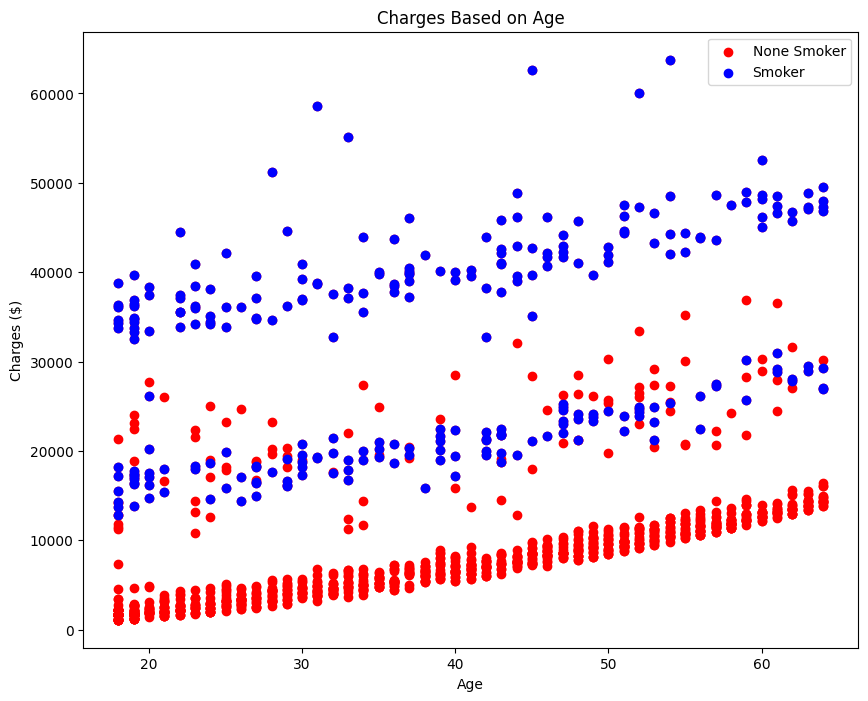

There appear to be 2 strong groups in the smoker group


In [58]:
#Analysing premium charges based on age and smoking status
smoker_df = oh_df[oh_df['smoker_yes'] == 1]

plt.figure(figsize=(10,8))

s1 = plt.scatter(oh_df["age"], oh_df["charges"], c ="r")
s2 = plt.scatter(smoker_df["age"], smoker_df["charges"], c ="b")


plt.title('Charges Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend([s1, s2], ["None Smoker", "Smoker"])

plt.show()
print("There appear to be 2 strong groups in the smoker group")

In [59]:
################ ANALYSING CHARGES FOR SMOKERS ###########################

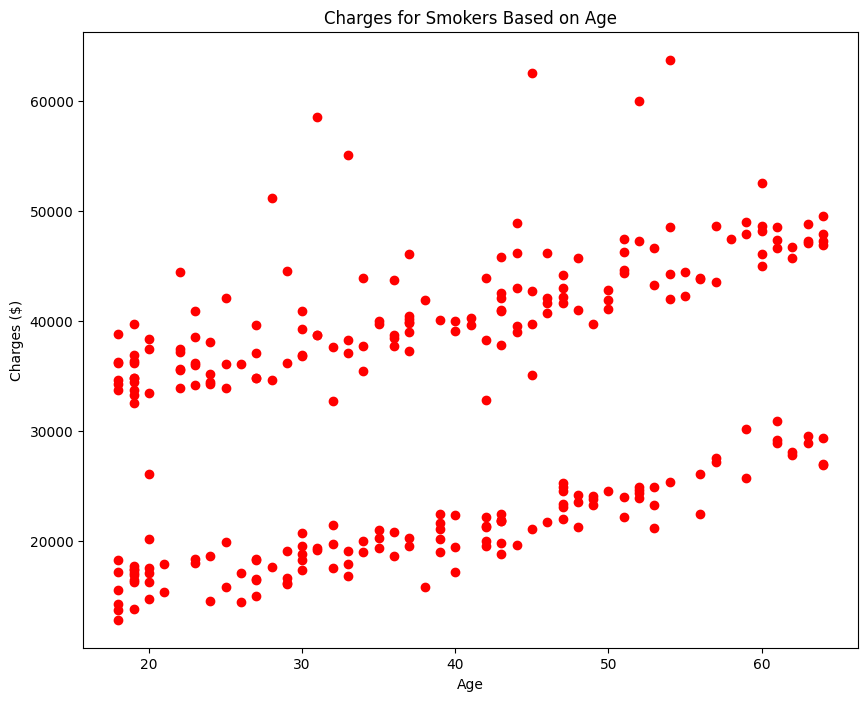

In [60]:
#Analysing premium charges based on age just for smokers
smoker_df = oh_df[oh_df['smoker_yes'] == 1]

plt.figure(figsize=(10,8))


plt.scatter(smoker_df["age"], smoker_df["charges"], c ="r")

plt.title('Charges for Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')

plt.show()

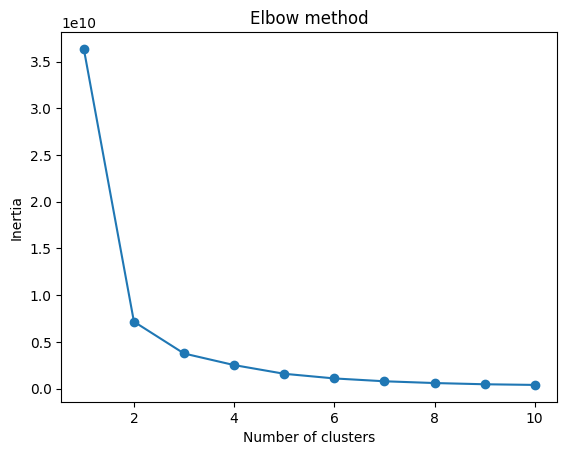

As expected a good value for the number of clusters is 2


In [61]:
#Split the data using K-means clustering to analyse both trends
#There should be two clusters


data = list(zip(smoker_df["age"], smoker_df["charges"]))
inertias = []
OMP_NUM_THREADS=2

#Using the elbow method to confirm the ideal number of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

#plotting the elbow
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

print("As expected a good value for the number of clusters is 2")

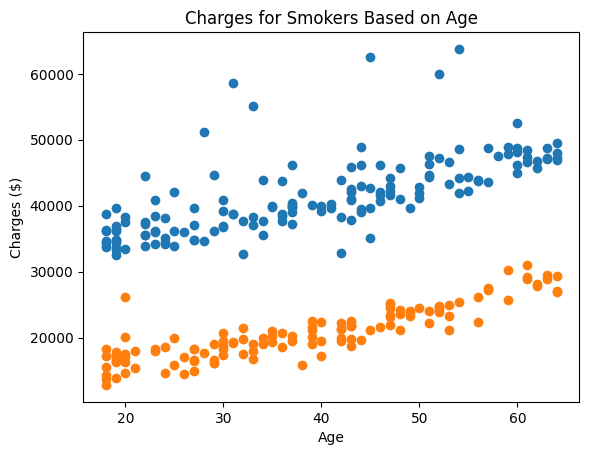

Min/ Max value in cluster 1:  32548.3405   63770.42801
Min/ Max value in cluster 2:  12829.4551   30942.1918
The 2 clusters can be split using the boundary: Charges = 31,000


In [62]:
# Splitting the data into 2 K clusters and plotting them

data = np.array(list(zip(smoker_df["age"], smoker_df["charges"])))

#Create the 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_.astype(int)
cluster_1_data = data[labels == 0]
cluster_2_data = data[labels == 1]

# Plot data points with different colours for each cluster
plt.scatter(cluster_1_data[:, 0], cluster_1_data[:, 1], label='Cluster 1')
plt.scatter(cluster_2_data[:, 0], cluster_2_data[:, 1], label='Cluster 2')
plt.title('Charges for Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

lo1 = cluster_1_data[:, 1].min()
hi1 = cluster_1_data[:, 1].max()
lo2 = cluster_2_data[:, 1].min()
hi2 = cluster_2_data[:, 1].max()
print("Min/ Max value in cluster 1: ", lo1, " ", hi1)
print("Min/ Max value in cluster 2: ", lo2, " ", hi2)
print("The 2 clusters can be split using the boundary: Charges = 31,000",  )

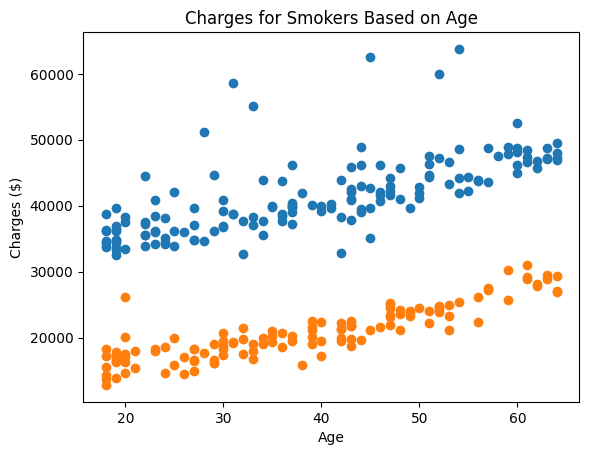

The plot made by splitting on £31000 is the same as for the clusters


In [63]:
#Splitting the 2 groups and then plotting to checks the split
high_smoker_df = smoker_df[smoker_df["charges"] > 31000]
low_smoker_df = smoker_df[smoker_df["charges"] < 31000]

plt.scatter(high_smoker_df["age"], high_smoker_df["charges"])
plt.scatter(low_smoker_df["age"], low_smoker_df["charges"])


plt.title('Charges for Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()
print("The plot made by splitting on £31000 is the same as for the clusters")

In [64]:
#Investigating the differences between the 2 clusters
high_smoker_means = high_smoker_df.mean()
low_smoker_means = low_smoker_df.mean()

print("high_smoker_means")
print(high_smoker_means)
print("\n")
print("low_smoker_means")
print(low_smoker_means)

print("Most of the features are similar except for BMI")

high_smoker_means
age                    39.060000
bmi                    35.131900
children                1.100000
charges             41437.189068
sex_male                0.646667
smoker_yes              1.000000
region_northeast        0.206667
region_northwest        0.166667
region_southeast        0.393333
region_southwest        0.233333
dtype: float64


low_smoker_means
age                    37.854839
bmi                    25.357500
children                1.129032
charges             20695.041627
sex_male                0.500000
smoker_yes              1.000000
region_northeast        0.290323
region_northwest        0.266129
region_southeast        0.258065
region_southwest        0.185484
dtype: float64
Most of the features are similar except for BMI


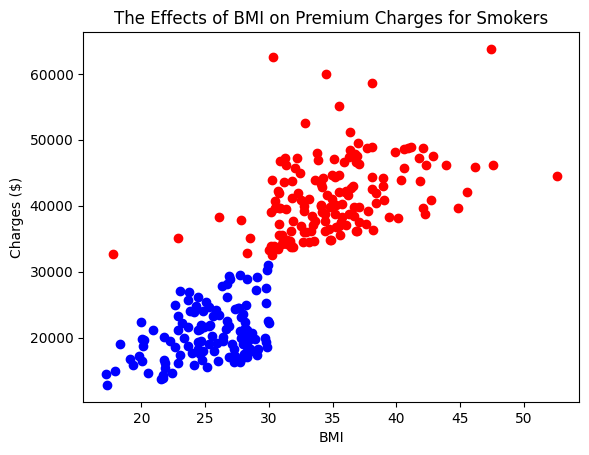

Lower cluster max BMI:  30.0
It appears that for smokers, if BMI > 30, the charges spike to 31k+


In [65]:
#Investigating the effect of BMI on premium charges
high_smoker_df = smoker_df[smoker_df["charges"] > 31000]
low_smoker_df = smoker_df[smoker_df["charges"] < 31000]

plt.scatter(high_smoker_df["bmi"], high_smoker_df["charges"], c ="r")
plt.scatter(low_smoker_df["bmi"], low_smoker_df["charges"], c ="b")


plt.title('The Effects of BMI on Premium Charges for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.show()
print("Lower cluster max BMI: ", low_smoker_df["bmi"].max())
print("It appears that for smokers, if BMI > 30, the charges spike to 31k+")

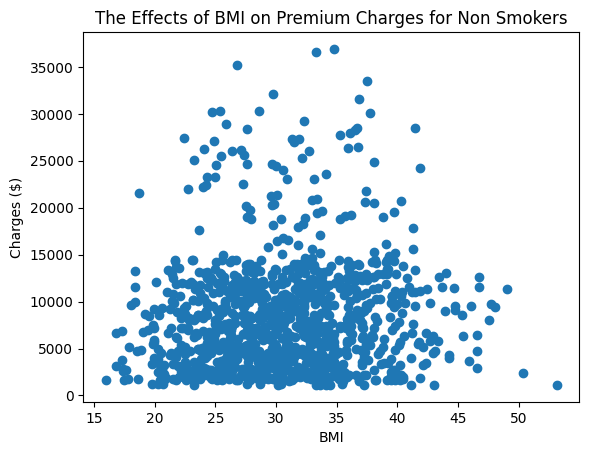

The data for non smokers doesn't seem to show the same split at 30 BMI as it does for smokers. It also doesn't seem to follow any strong correlation


In [66]:
#Checking the data for non smokers
none_smoker_df = oh_df[oh_df['smoker_yes'] == 0]
plt.scatter(none_smoker_df["bmi"], none_smoker_df["charges"])

plt.title('The Effects of BMI on Premium Charges for Non Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.show()

print("The data for non smokers doesn't seem to show the same split at 30 BMI as it does for smokers. It also doesn't seem to follow any strong correlation")

Shape before filtering (high smoker):  (150, 10)
Shape before filtering (low smoker):  (124, 10)
Shape after filtering (high smoker) std =  1.4 (122, 10)
Shape after filtering (low smoker) std =  1.4 (124, 10)
Shape after filtering (high smoker) std =  1.5 (126, 10)
Shape after filtering (low smoker) std =  1.5 (124, 10)
Shape after filtering (high smoker) std =  1.7 (134, 10)
Shape after filtering (low smoker) std =  1.7 (124, 10)
Shape after filtering (high smoker) std =  1.8 (135, 10)
Shape after filtering (low smoker) std =  1.8 (124, 10)
Shape after filtering (high smoker) std =  2 (138, 10)
Shape after filtering (low smoker) std =  2 (124, 10)
Shape after filtering (high smoker) std =  5 (150, 10)
Shape after filtering (low smoker) std =  5 (124, 10)


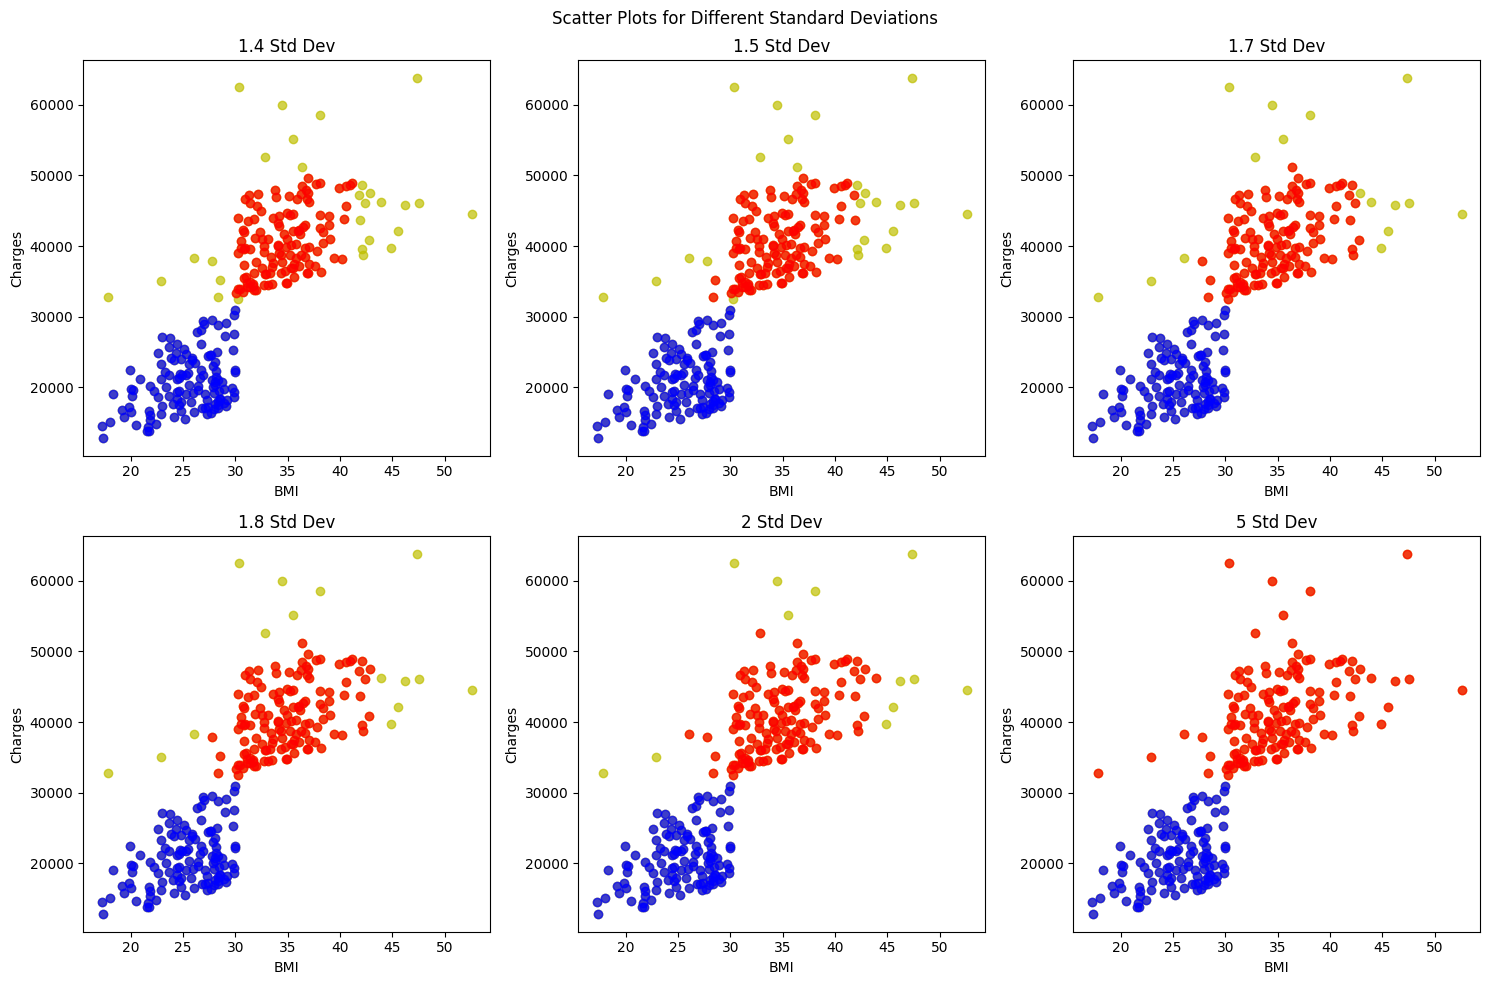

Using the normal distribution doesn't seem like the ideal way to clean the 
data because it removes to many relevant values. The outliers will be isolated manually


In [67]:
#Analysing outliers using the normal distribution
#The data for bmi < 30 doesn't appear to have significant outliers so wont be trimmed

from scipy import stats

#Function to remove data based on standard deviations
def filter_dataframe(df, col_name, num_std_dev):
    mean = df[col_name].mean()
    std = df[col_name].std()
    threshold = num_std_dev * std
    df = df[(df[col_name] >= mean - threshold) & (df[col_name] <= mean + threshold)]
    return df


#Standard deviations to test
std_devs = [1.4, 1.5, 1.7, 1.8, 2, 5] #5 included just to show the full range of data


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots for Different Standard Deviations')

#Printing shapes to check how much data is lost after trimming
print("Shape before filtering (high smoker): ", high_smoker_df.shape )
print("Shape before filtering (low smoker): ", low_smoker_df.shape )

#Filter for each standard deviaton
for i, num_std_dev in enumerate(std_devs):
    row = i // 3
    col = i % 3
    
    
    high_trimmed = filter_dataframe(high_smoker_df, "charges", num_std_dev) 
    low_trimmed = filter_dataframe(low_smoker_df, "charges", 5)              #Not filtering lower values because no outliers
    high_trimmed = filter_dataframe(high_trimmed, "bmi", num_std_dev) 
    low_trimmed = filter_dataframe(low_trimmed, "bmi", 5)                   #Not filtering lower values because no outliers
    
    #Plot
    axes[row, col].scatter(high_smoker_df["bmi"], high_smoker_df["charges"], c="y", label='High Smoker', alpha=0.7)
    axes[row, col].scatter(low_smoker_df["bmi"], low_smoker_df["charges"], c="y", label='Low Smoker', alpha=0.7)
    axes[row, col].scatter(high_trimmed["bmi"], high_trimmed["charges"], c="r", label='High Smoker', alpha=0.7)
    axes[row, col].scatter(low_trimmed["bmi"], low_trimmed["charges"], c="b", label='Low Smoker', alpha=0.7)
    axes[row, col].set_title(f'{num_std_dev} Std Dev')
    axes[row, col].set_xlabel('BMI')
    axes[row, col].set_ylabel('Charges')
    
    print("Shape after filtering (high smoker) std = ", num_std_dev , high_trimmed.shape )
    print("Shape after filtering (low smoker) std = ", num_std_dev, low_trimmed.shape )

plt.tight_layout()
plt.show()

print("""Using the normal distribution doesn't seem like the ideal way to clean the 
data because it removes to many relevant values. The outliers will be isolated manually""")



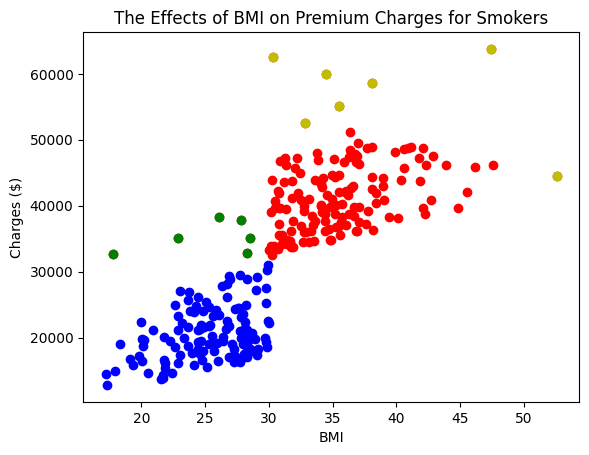

In [68]:
#Isolating outliers
low_outlier_df = high_smoker_df[high_smoker_df["bmi"] < 30]
low_outlier_df = low_outlier_df[low_outlier_df["charges"] > 30000]

high_outlier_df = high_smoker_df[high_smoker_df["bmi"] > 30]
high_outlier_df = high_outlier_df[(high_outlier_df["charges"] > 52000) | (high_outlier_df["bmi"] > 50)]

high_smoker_df = smoker_df[smoker_df["charges"] > 31000]
low_smoker_df = smoker_df[smoker_df["charges"] < 31000]

#plotting outliers to check if they have been isolated correctly
plt.scatter(high_smoker_df["bmi"], high_smoker_df["charges"], c ="r")
plt.scatter(low_smoker_df["bmi"], low_smoker_df["charges"], c ="b")
plt.scatter(low_outlier_df["bmi"], low_outlier_df["charges"], c ="g")
plt.scatter(high_outlier_df["bmi"], high_outlier_df["charges"], c ="y")


plt.title('The Effects of BMI on Premium Charges for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.show()

In [69]:
#Checking means of outliers to investigate their cause
low_outlier_mean = low_outlier_df.mean()
high_outlier_mean = high_outlier_df.mean()

print("low_smoker_means")
print(low_smoker_means)

print("low_outlier_mean")
print(low_outlier_mean)

print("high_smoker_means")
print(high_smoker_means)

print("high_outlier_mean")
print(high_outlier_mean)

print("""There doesn't seem to be much deviation from the means of the outlier to the means of the regular data.
There do appear to be more men in the low outlier means, but there are so few data points that it could have no correlation.
""")

low_smoker_means
age                    37.854839
bmi                    25.357500
children                1.129032
charges             20695.041627
sex_male                0.500000
smoker_yes              1.000000
region_northeast        0.290323
region_northwest        0.266129
region_southeast        0.258065
region_southwest        0.185484
dtype: float64
low_outlier_mean
age                    38.000000
bmi                    25.223333
children                1.000000
charges             35302.310893
sex_male                0.833333
smoker_yes              1.000000
region_northeast        0.333333
region_northwest        0.333333
region_southeast        0.166667
region_southwest        0.166667
dtype: float64
high_smoker_means
age                    39.060000
bmi                    35.131900
children                1.100000
charges             41437.189068
sex_male                0.646667
smoker_yes              1.000000
region_northeast        0.206667
region_northwest        0.1

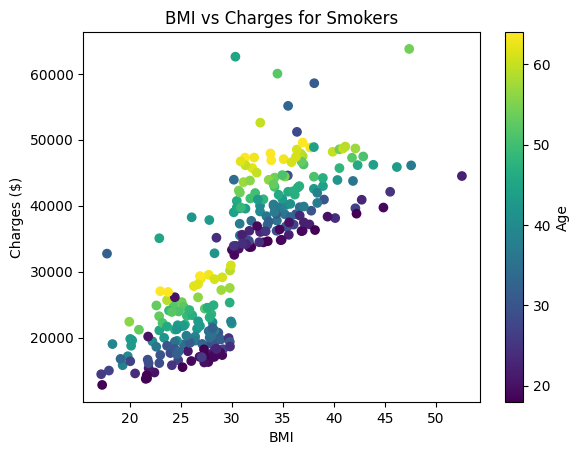

"The general trend is that with age the charges increase *including the bump when bmi>30.*
The outliers dont appear to be caused by age.



In [70]:
#Investigating the effect of age on charges and the outliers

plt.scatter(high_smoker_df["bmi"], high_smoker_df["charges"], c =high_smoker_df["age"], cmap = "viridis", marker='o')
plt.scatter(low_smoker_df["bmi"], low_smoker_df["charges"], c =low_smoker_df["age"], cmap = "viridis", marker='o')
plt.title('BMI vs Charges for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
cbar = plt.colorbar()
cbar.set_label('Age')
plt.show()

print(""""The general trend is that with age the charges increase *including the bump when bmi>30.*
The outliers dont appear to be caused by age.
""")

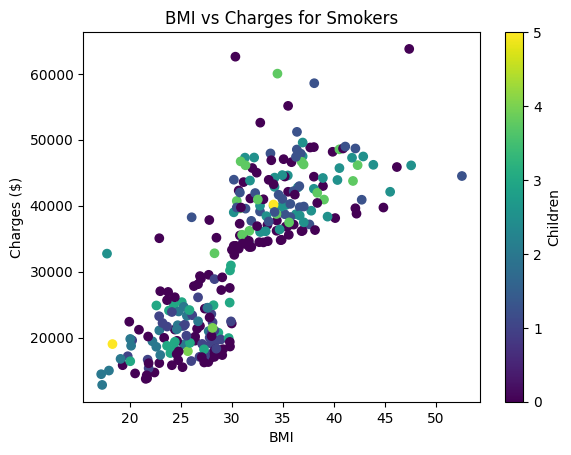

"There doesn't appear to be a strong trend between the number of children and charges.
The outliers dont appear to be caused by number of children.



In [71]:
#Investigating the effect of age on charges and the outliers

plt.scatter(high_smoker_df["bmi"], high_smoker_df["charges"], c =high_smoker_df["children"], cmap = "viridis", marker='o')
plt.scatter(low_smoker_df["bmi"], low_smoker_df["charges"], c =low_smoker_df["children"], cmap = "viridis", marker='o')


plt.title('BMI vs Charges for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
cbar = plt.colorbar()
cbar.set_label('Children')
plt.show()
print(""""There doesn't appear to be a strong trend between the number of children and charges.
The outliers dont appear to be caused by number of children.
""")

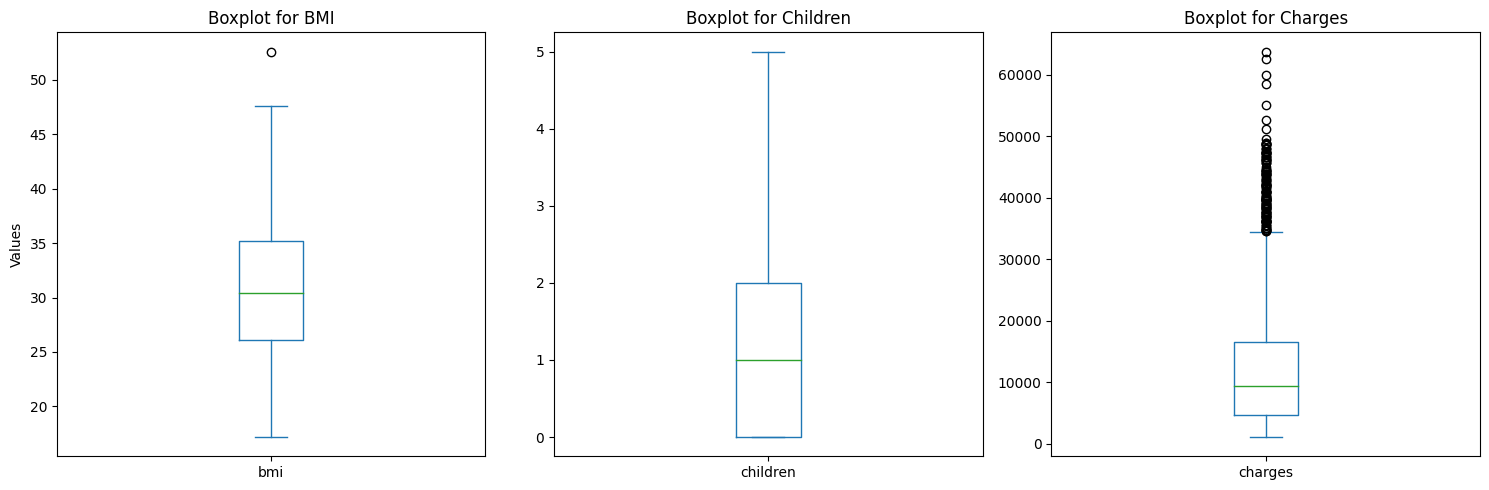

In [72]:
#Investigating general outliers using boxplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

smoker_df["bmi"].plot.box(ax=axs[0])
axs[0].set_title('Boxplot for BMI')

smoker_df["children"].plot.box(ax=axs[1])
axs[1].set_title('Boxplot for Children')

oh_df["charges"].plot.box(ax=axs[2])
axs[2].set_title('Boxplot for Charges')

axs[0].set_ylabel('Values')
plt.tight_layout()
plt.show()

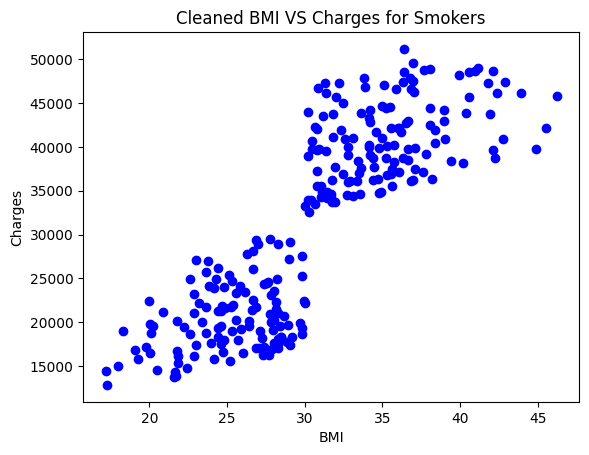

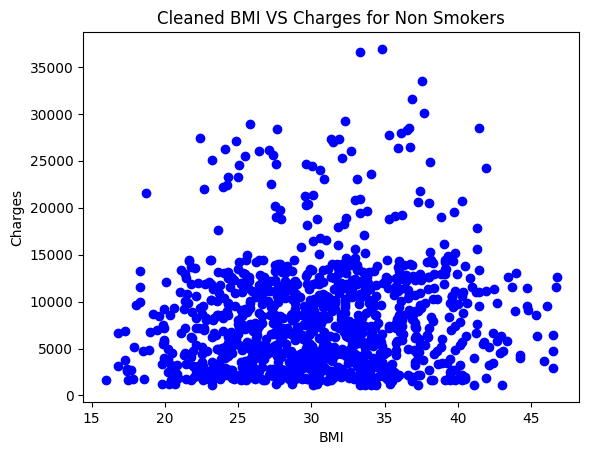

In [73]:
#Drop outliers
oh_df = oh_df[oh_df["bmi"] < 47]
oh_df = oh_df[oh_df["charges"] < 52000]

condition1 = (oh_df['bmi'] < 30)
condition2 = (oh_df['charges'] > 30000)
oh_df = oh_df.drop(oh_df[condition1 & condition2].index)

#Create smoker data for later
smoker_df = oh_df[oh_df["smoker_yes"] == 1]

#View data
plt.scatter(oh_df. loc[oh_df['smoker_yes'] == 1, 'bmi'], oh_df.loc[oh_df['smoker_yes'] == 1, 'charges'], c ="b")
plt.title('Cleaned BMI VS Charges for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#View data
plt.scatter(oh_df. loc[oh_df['smoker_yes'] == 0, 'bmi'], oh_df.loc[oh_df['smoker_yes'] == 0, 'charges'], c ="b")
plt.title('Cleaned BMI VS Charges for Non Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

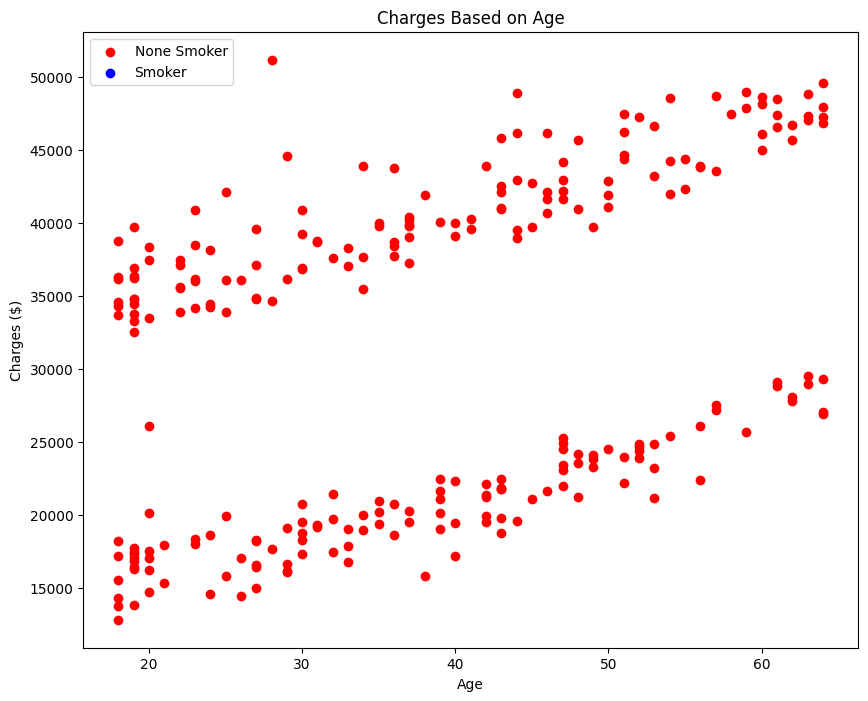

In [74]:
#View clean smoker data
plt.figure(figsize=(10,8))

s1 = plt.scatter(smoker_df["age"], smoker_df["charges"], c ="r")

plt.title('Charges Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend([s1, s2], ["None Smoker", "Smoker"])

plt.show()

#remove  final outliers
smoker_df = smoker_df[~((smoker_df["age"] < 30) & (smoker_df["charges"] < 30000) & (smoker_df["charges"] > 25000))]
smoker_df = smoker_df[~((smoker_df["age"] < 30) & (smoker_df["charges"] > 50000))]

In [75]:
################ ANALYSING CHARGES FOR NON SMOKERS ###########################

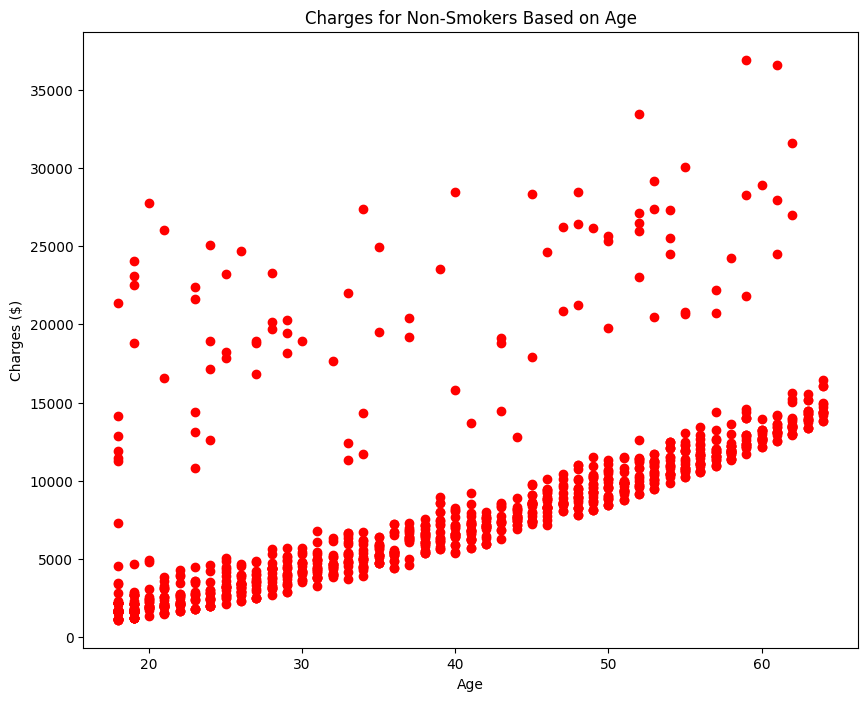

This data appears to have a lot of outliers going away from the general trend


In [76]:
#Analysing premium charges based on age just for non smokers
non_smoker_df = oh_df[oh_df['smoker_yes'] == 0]

plt.figure(figsize=(10,8))
plt.scatter(non_smoker_df["age"], non_smoker_df["charges"], c ="r")
plt.title('Charges for Non-Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

print("This data appears to have a lot of outliers going away from the general trend")

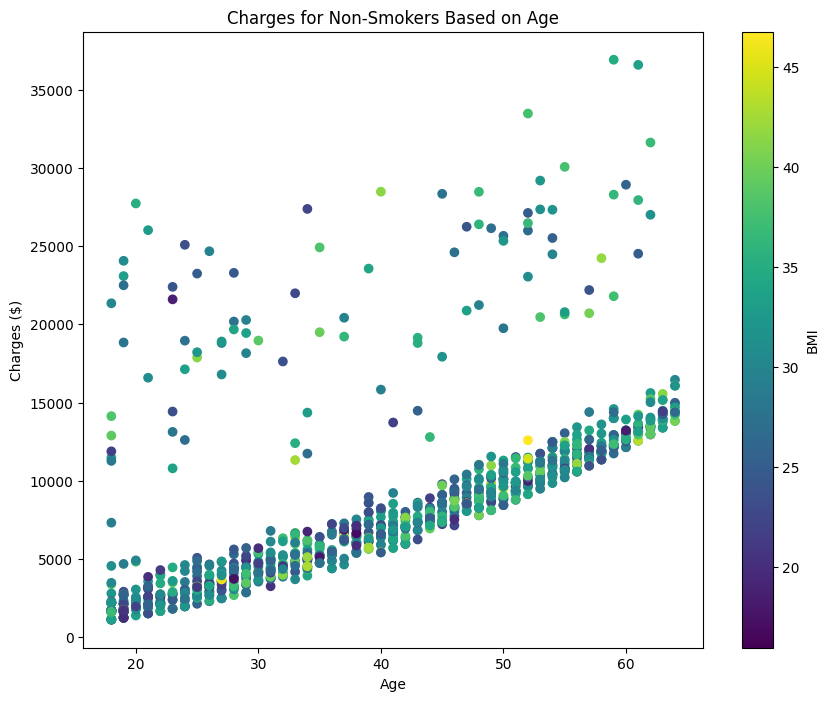

It is not easy to determine if BMI affects charges from this plot because the data is very mixed


In [77]:
# Checking the effects of BMI on the outliers

plt.figure(figsize=(10,8))
plt.scatter(non_smoker_df["age"], non_smoker_df["charges"], c =non_smoker_df["bmi"], cmap = "viridis", marker='o')
plt.title('Charges for Non-Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
cbar = plt.colorbar()
cbar.set_label('BMI')
plt.show()

print("It is not easy to determine if BMI affects charges from this plot because the data is very mixed")

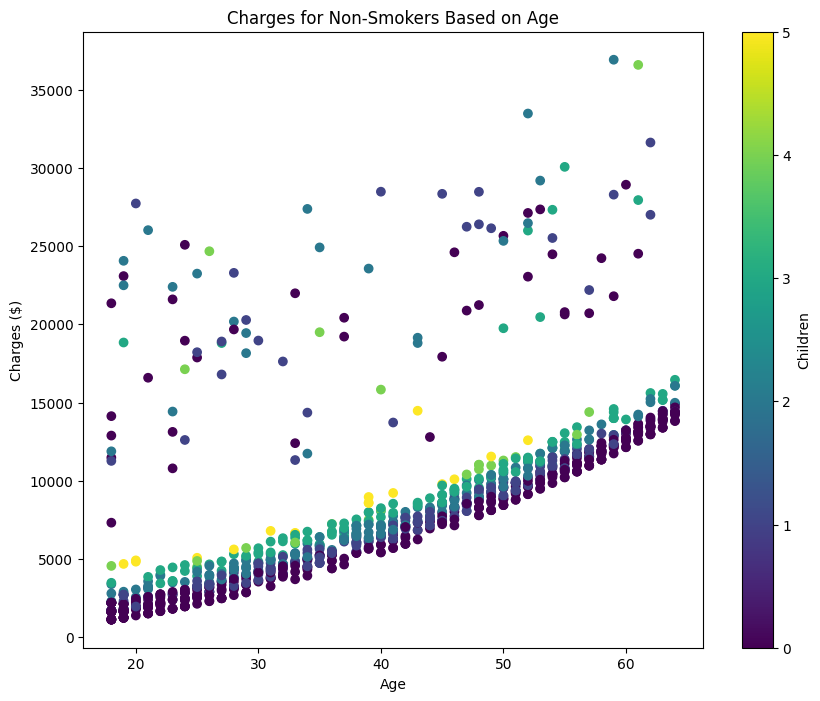

In general having more children increases premium prices. But this doesn't seem to be the cause of the outliers


In [78]:
# Checking the effects of children on the outliers

plt.figure(figsize=(10,8))
plt.scatter(non_smoker_df["age"], non_smoker_df["charges"], c =non_smoker_df["children"], cmap = "viridis", marker='o')
plt.title('Charges for Non-Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
cbar = plt.colorbar()
cbar.set_label('Children')

plt.show()

print("In general having more children increases premium prices. But this doesn't seem to be the cause of the outliers")

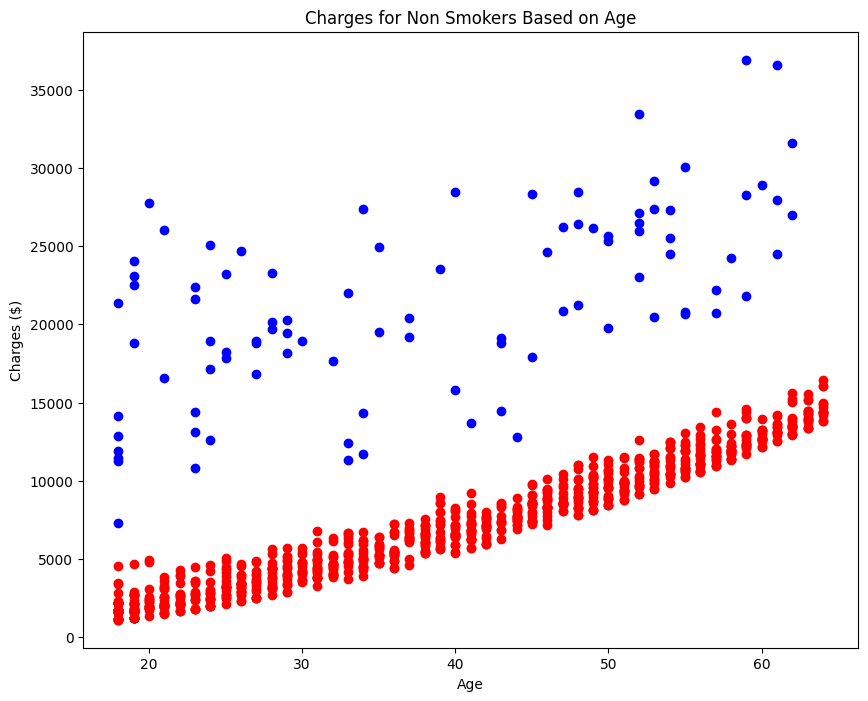

Filtered data shape: (959, 10)
Outlier data shape: (94, 10)
Original shape: (1053, 10)
New data combined shape: ( 1053 ,10)
No data lost. Can now be compared


In [79]:
#Filter out the outliers from the main trend to perform further analysis
non_smoker_filtered_df = non_smoker_df[non_smoker_df["charges"] < 17000]
non_smoker_filtered_df = non_smoker_filtered_df[~((non_smoker_filtered_df["age"] < 45) & (non_smoker_filtered_df["charges"] > 10000))]
non_smoker_filtered_df = non_smoker_filtered_df[~((non_smoker_filtered_df["age"] < 25) & (non_smoker_filtered_df["charges"] > 6000))]

non_smoker_outlier_df = non_smoker_df[(  (non_smoker_df["charges"] > 6000)  )]
non_smoker_outlier_df = non_smoker_outlier_df[~((non_smoker_outlier_df["age"] > 30) & (non_smoker_outlier_df["charges"] < 10000))]
non_smoker_outlier_df = non_smoker_outlier_df[~((non_smoker_outlier_df["age"] > 45) & (non_smoker_outlier_df["charges"] < 17000))]


plt.figure(figsize=(10,8))
plt.scatter(non_smoker_filtered_df["age"], non_smoker_filtered_df["charges"], c ="r")
plt.scatter(non_smoker_outlier_df["age"], non_smoker_outlier_df["charges"], c ="b")
plt.title('Charges for Non Smokers Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

print("Filtered data shape:", non_smoker_filtered_df.shape)
print("Outlier data shape:", non_smoker_outlier_df.shape)
print("Original shape:", non_smoker_df.shape)
print("New data combined shape: (", non_smoker_filtered_df.shape[0] + non_smoker_outlier_df.shape[0], ",10)")
print("No data lost. Can now be compared")

In [80]:
#Comparing outlier mean to main trend mean
print("Filtered data:")
print(non_smoker_filtered_df.mean())
print("Outlier data:")
print(non_smoker_outlier_df.mean())
print("There don't seem to be strong differences in the 2 groups. The increased premium charges could be due to other factors not shown in this data eg past claims")

Filtered data:
age                   39.401460
bmi                   30.488545
children               1.078206
charges             7047.818367
sex_male               0.483837
smoker_yes             0.000000
region_northeast       0.234619
region_northwest       0.255474
region_southeast       0.250261
region_southwest       0.259645
dtype: float64
Outlier data:
age                    38.329787
bmi                    31.318085
children                1.223404
charges             21435.904277
sex_male                0.468085
smoker_yes              0.000000
region_northeast        0.308511
region_northwest        0.212766
region_southeast        0.297872
region_southwest        0.180851
dtype: float64
There don't seem to be strong differences in the 2 groups. The increased premium charges could be due to other factors not shown in this data eg past claims


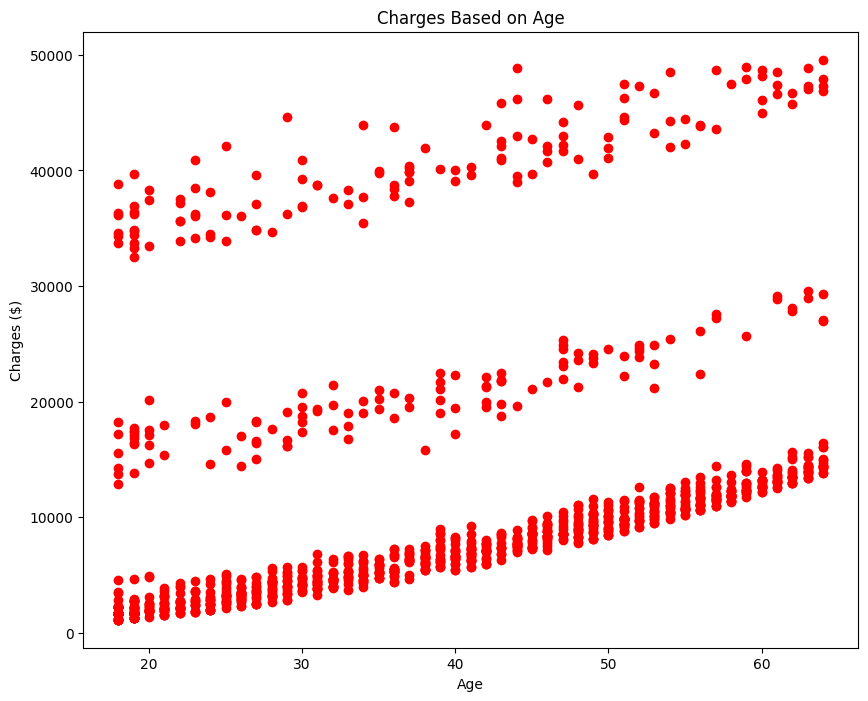

In [81]:
#The outlier data can be dropped. Smoker and non smoker data can be combined now that it is cleaned
clean_df = pd.concat([non_smoker_filtered_df, smoker_df], ignore_index=True)

plt.figure(figsize=(10,8))
plt.scatter(clean_df["age"], clean_df["charges"], c ="r")
plt.title('Charges Based on Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()


In [82]:
#Save Dataframe

clean_df.to_csv('CleanInsurance.csv', index=False)

#Change df name
model_df = oh_df
model_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


In [83]:
######## CREATING A REGRESSION MODEL TO PREDICT PREMIUM CHARGES ##########

In [84]:
#Finding the degree of polynomial which gives the least mse

X, y = clean_df[['age','bmi','children','sex_male', "smoker_yes"]], clean_df["charges"]

mse = []

#Scale data because it has great disparity, e.g., charges = 50000, children = 4
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Test polynomial features to the 10th degree
for degree in range(1,11):
    poly = PolynomialFeatures(degree=degree, include_bias=False) 
    poly_features = poly.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)     #Split into test and training sets
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse
    
    
    mse.append(rmse)
    print(degree)
mse

1
2
3
4
5
6
7
8
9
10


[4048.29911185701,
 1806.2445201545713,
 1869.045462509856,
 1621.95678257965,
 1878.6668329512997,
 3107.2213837666045,
 47312.71473959187,
 5403444787083.712,
 25292788.52501141,
 3083387.646132887]

In [85]:
#Training the final model with optimal polynomial degree 4.

poly = PolynomialFeatures(degree=4, include_bias=False) #Create polynomial features, n = 4
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) #Split into test and training sets
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test) #Predict values
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [86]:
############This cell was used to predict values using regularization but resulted in a less accurate model#############

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import Ridge
# import numpy as np

# alphas = np.logspace(-3, 2, 100)
# ridge_reg_model = Ridge()
# param_dist = {'alpha': alphas}
# randomized_search = RandomizedSearchCV(ridge_reg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
# randomized_search.fit(X_train, y_train)
# best_alpha = randomized_search.best_params_['alpha']
# best_ridge_model = randomized_search.best_estimator_

# y_pred = best_ridge_model.predict(X_test)
# print("Alpha: ", alpha)

In [87]:
#Putting data in a df to make it easier to compare
pf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pf

,Actual,Predicted
739,12124.99240,11722.377746
788,11353.22760,11566.153617
43,4133.64165,4156.335369
155,5002.78270,5407.434353
494,7729.64575,7591.783554
...,...,...
311,1149.39590,1734.303971
1042,42303.69215,35137.122211
597,7445.91800,7827.193164
1164,41676.08110,43674.332614


In [88]:
# Calculating R-squared

r_squared = r2_score(pf["Actual"], pf["Predicted"])
print("R Squared result:", r_squared)

R Squared result: 0.9782720821541913


In [89]:
#Calculating the average percentage difference to have a more "human-readable" metric

percentage_difference = abs((pf["Actual"] - pf["Predicted"]) / pf["Actual"] * 100)
percentage_dif = percentage_difference.mean()
accuracy = 100 - percentage_dif
print("The model can predict values wih an average accuracy of:",  "{:.1f}".format(accuracy), "%")

The model can predict values wih an average accuracy of: 92.5 %


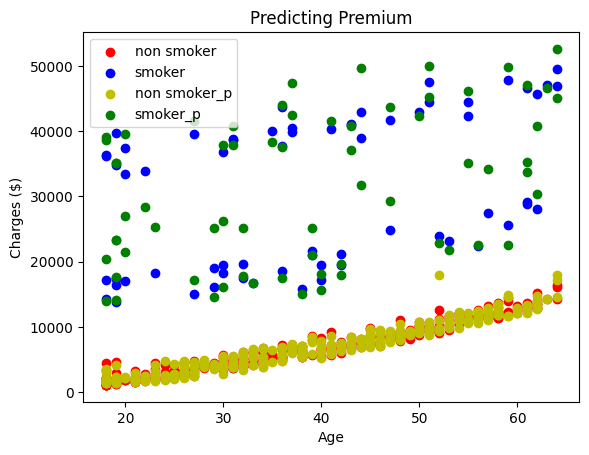

In [90]:
#Plotting the results to get a visual understanding

smoker_column = X_test[:, 4]  # Use index 4 for the smoker column, to plot it separately

s1 = plt.scatter(X_test[smoker_column == 0, 0], y_test[smoker_column == 0], c="r", label="Non-Smokers")
s2 = plt.scatter(X_test[smoker_column == 1, 0], y_test[smoker_column == 1], c="b", label="Smokers")
s3 = plt.scatter(X_test[smoker_column == 0, 0], y_pred[smoker_column == 0], c="y", label="Non-Smokers_P")
s4 = plt.scatter(X_test[smoker_column == 1, 0], y_pred[smoker_column == 1], c="g", label="Smokers_P")

plt.title('Predicting Premium')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend([s1, s2, s3, s4], ["non smoker", "smoker", "non smoker_p", "smoker_p" ])
plt.show()

In [91]:
#Predict a value for premium charge using own parameters

age = 30
bmi = 25
children = 2
sex = 1
smoker = 1

predict = np.array([age, bmi, children, sex, smoker])

predict = predict.reshape(1, -1)


poly_pred = poly.fit_transform(predict)
charge_pred = int(reg_model.predict(poly_pred))

print("Insurance premium charge for a smoking 30 year old male with 25 bmi, 2 children is:")
print( "$", "{:.0f}".format(charge_pred))



Insurance premium charge for a smoking 30 year old male with 25 bmi, 2 children is:
$ 17032


In [92]:
##### Comparing the regression model to a regression model on the raw data

X_t, y_t = test_df[['age','bmi','children','sex_male', "smoker_yes"]], test_df["charges"]


poly_t = PolynomialFeatures(degree=4, include_bias=False) 

poly_features_t = poly.fit_transform(X_t)
#Split into test and training sets
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(poly_features_t, y_t, test_size=0.3, random_state=42)
reg_model_t = LinearRegression()
reg_model_t.fit(X_train_t, y_train_t)
y_pred_t = reg_model_t.predict(X_test_t)
rmse_t = np.sqrt(mean_squared_error(y_test_t, y_pred_t))

pf_t = pd.DataFrame({'Actual': y_test_t, 'Predicted': y_pred_t})

r_squared_t = r2_score(pf_t["Actual"], pf_t["Predicted"])
print("R Squared result:", r_squared_t)

percentage_difference = abs((pf_t["Actual"] - pf_t["Predicted"]) / pf_t["Actual"] * 100)
percentage_dif_t = percentage_difference.mean()
accuracy_t = 100 - percentage_dif_t
print("The model can predict values wih an accuracy of:",  "{:.1f}".format(accuracy_t), "%")

R Squared result: 0.8202059289853295
The model can predict values wih an accuracy of: 65.5 %
